In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\Shweta\Downloads\Customer_Service_Requests_Analysis_Dataset\Customer_Service_Requests_Analysis_Dataset\311-service-requests-nyc\311_Service_Requests_from_2010_to_Present.csv", parse_dates=['Created Date', 'Closed Date'])

In [6]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [7]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [8]:
df.shape

(364558, 53)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      358057 non-null  object        
 7   Location Type                   364425 non-null  object        
 8   Incident Zip                    361560 non-null  float64       
 9   Incident Address                312859 non-null  object        
 10  Street Name                     312859 non-null  object 

In [10]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [11]:
df.columns= df.columns.str.replace(" ", "_")

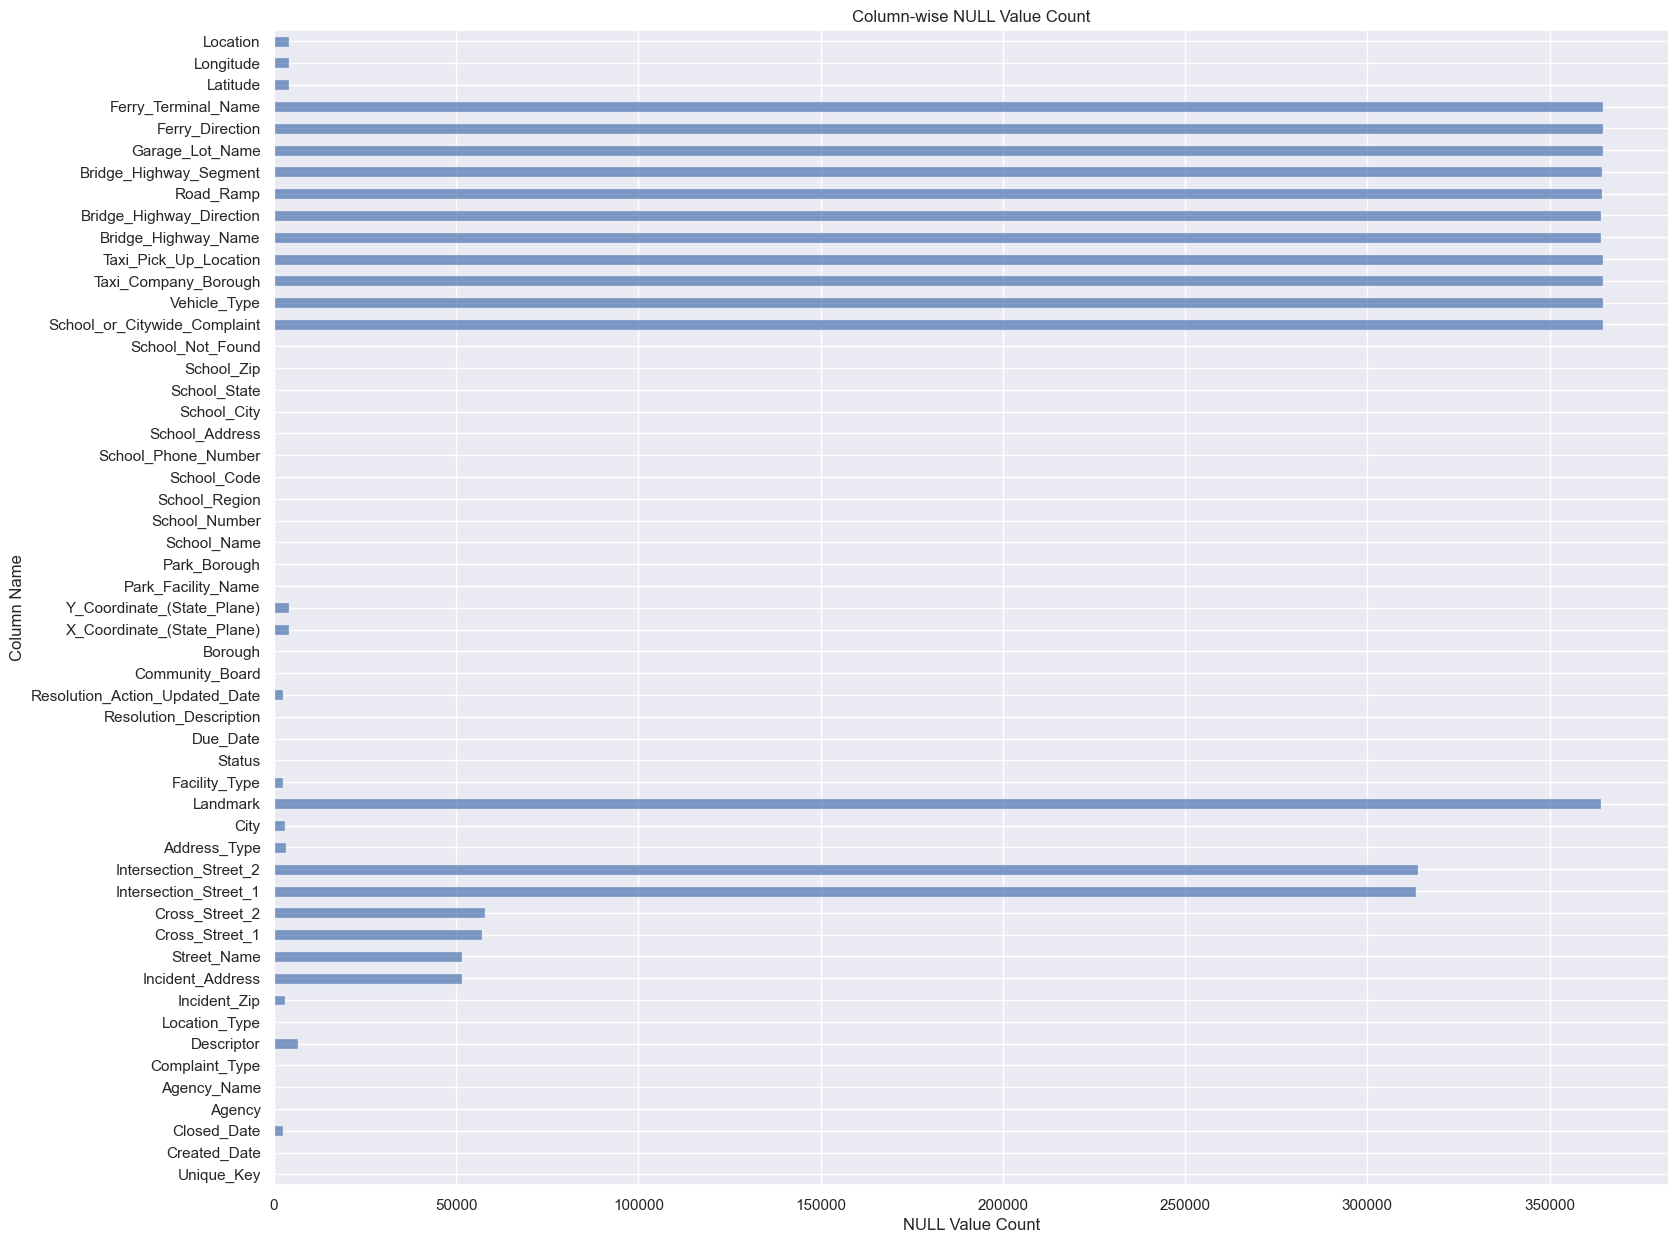

In [12]:
sns.set()
df.isnull().sum().plot(kind='barh', alpha= 0.7, figsize= (18,15), title="Column-wise NULL Value Count")
plt.xlabel('NULL Value Count')
plt.ylabel('Column Name')
plt.show()

In [13]:
df[['Closed_Date', 'Created_Date']].isnull().sum()

Closed_Date     2381
Created_Date       0
dtype: int64

In [14]:
df = df[pd.notnull(df['Closed_Date'])]

df[['Closed_Date', 'Created_Date']].isnull().sum()

In [15]:
a=(df.Created_Date[0] - df.Closed_Date[0] )
a.seconds

83070

In [16]:
df['Request_Closing_Time']=  df.Closed_Date - df.Created_Date

In [17]:
df['Request_Closing_Time']=df['Request_Closing_Time']/np.timedelta64(1,'s')

In [18]:
df['Request_Closing_Time'].head()

0     3330.0
1     5233.0
2    17494.0
3    27927.0
4    12464.0
Name: Request_Closing_Time, dtype: float64

In [19]:
df['Request_Closing_Time'].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_Closing_Time, dtype: float64

In [20]:
df['Request_Closing_Time'].mean()

15113.299632500131

In [21]:
df[['City', 'Complaint_Type']].isnull().sum()

City              674
Complaint_Type      0
dtype: int64

In [22]:
df['City'].fillna('Unknown City', inplace= True)

In [23]:
df[['City', 'Complaint_Type']].isnull().sum()

City              0
Complaint_Type    0
dtype: int64

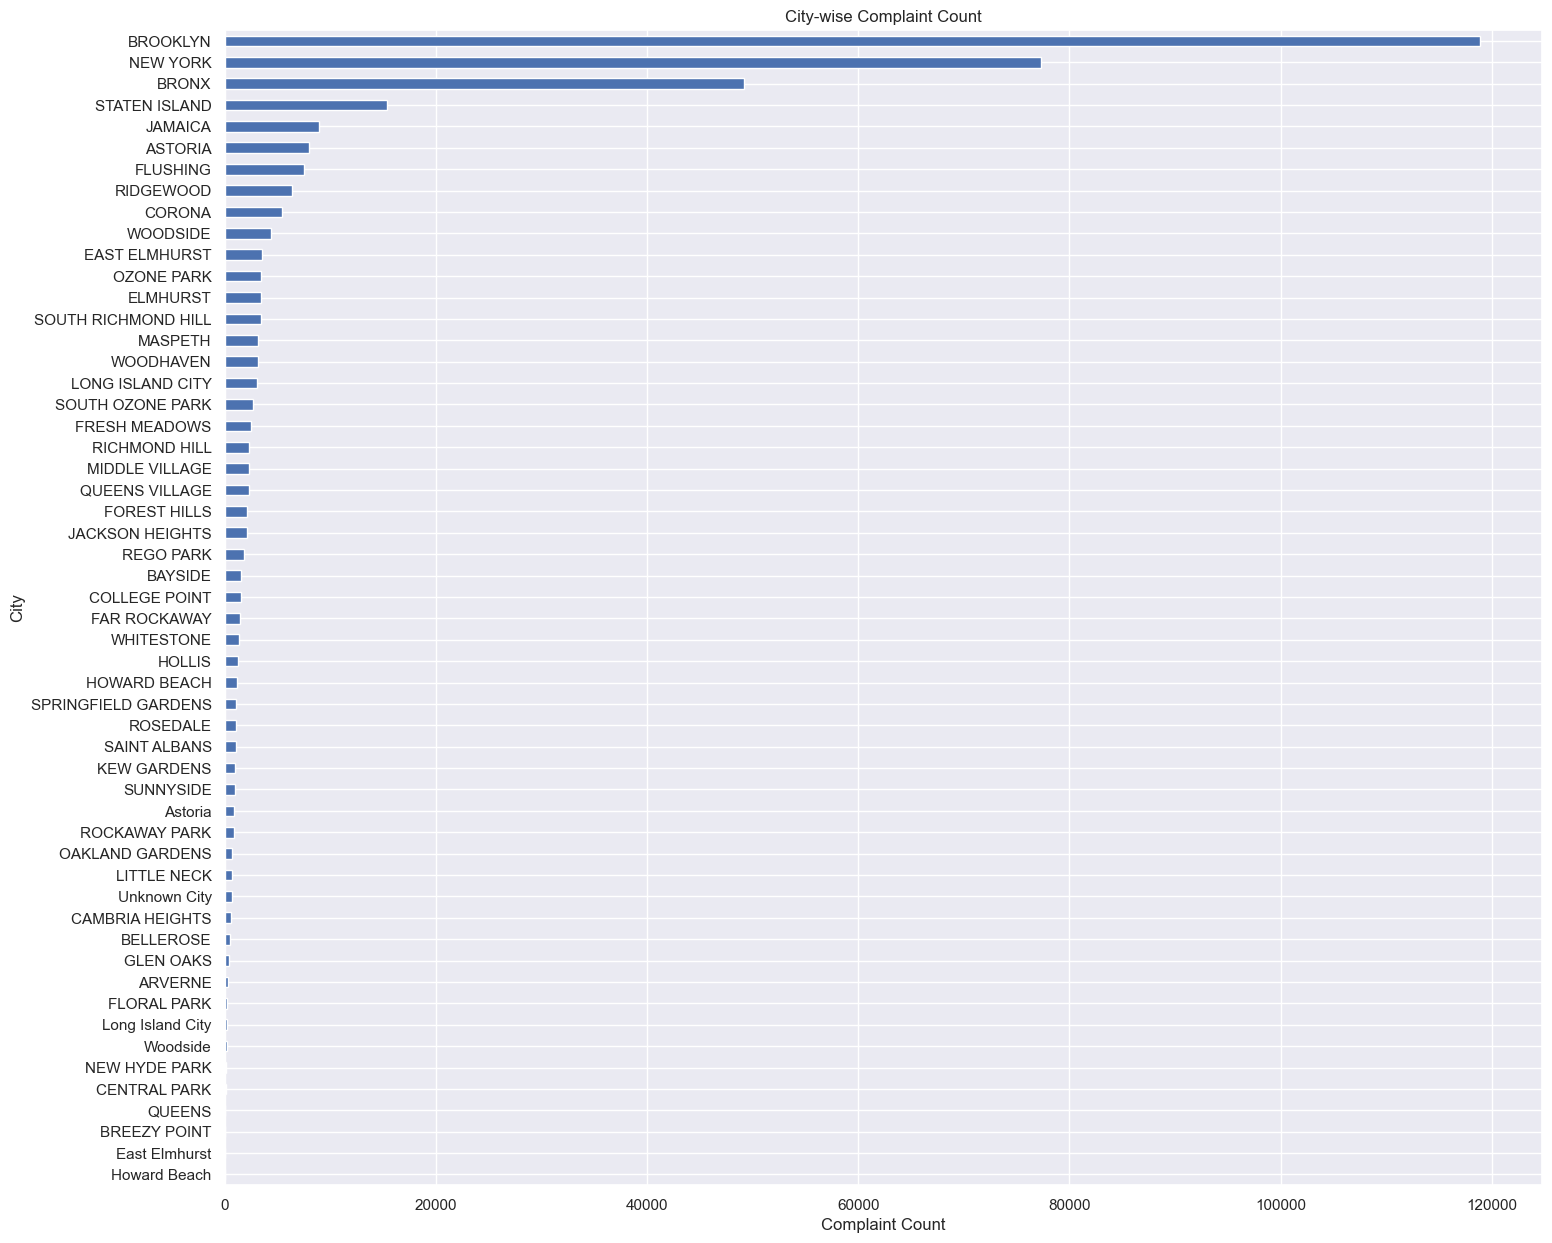

In [24]:
sns.set()
df['City'].value_counts().sort_values(ascending= True).plot(kind= 'barh', figsize=(17,15), title="City-wise Complaint Count")
plt.xlabel('Complaint Count')
plt.ylabel('City')
plt.show()

In [25]:
brooklyn_data = df[df['City']=='BROOKLYN']

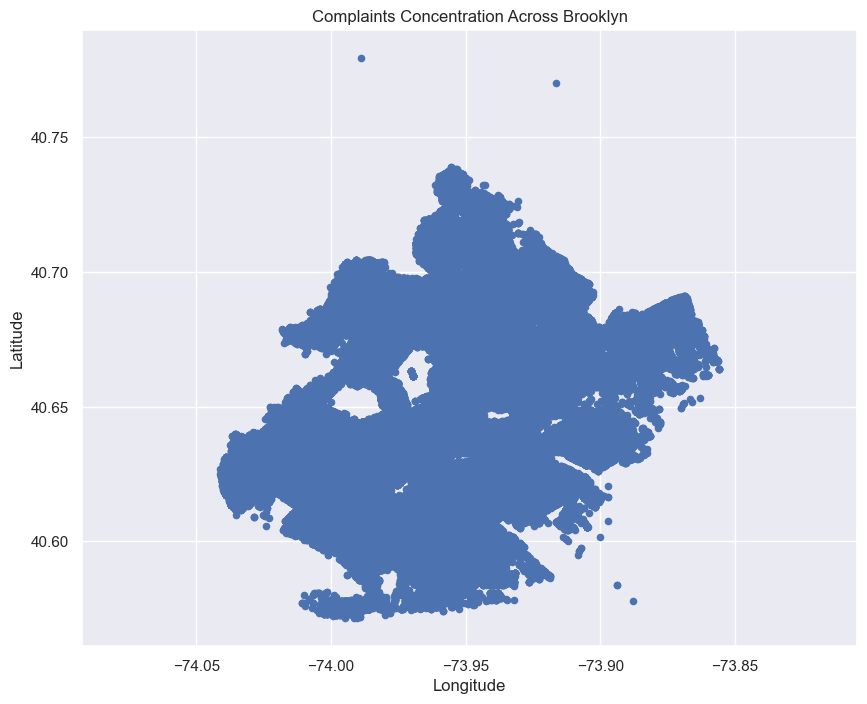

In [26]:
brooklyn_data[['Longitude', 'Latitude']].plot(kind='scatter', 
                                         x='Longitude', 
                                         y='Latitude', 
                                         figsize=(10,8), 
                                         title = 'Complaints Concentration Across Brooklyn'
                                        ).axis('equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

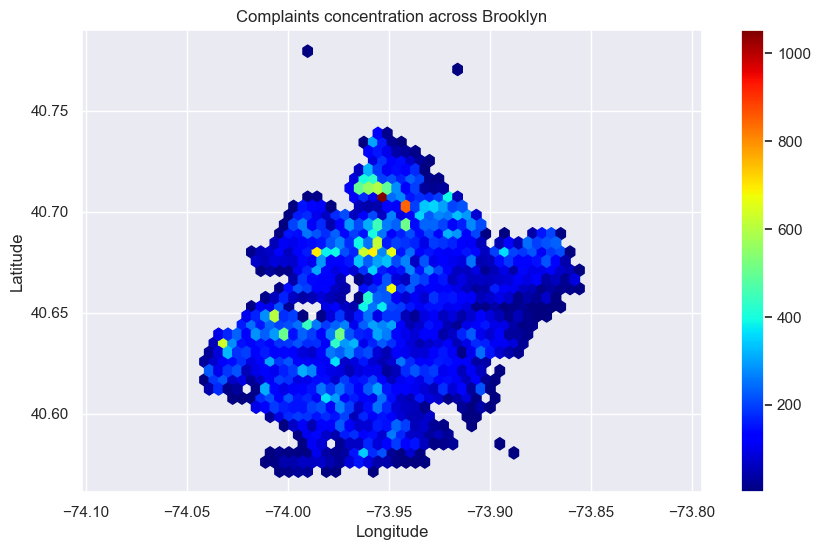

In [27]:
brooklyn_data.plot(kind='hexbin', 
              x='Longitude', 
              y='Latitude', 
              gridsize=40,
              colormap = 'jet',
              mincnt=1,
              title = 'Complaints concentration across Brooklyn',
              figsize=(10,6)
             ).axis('equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

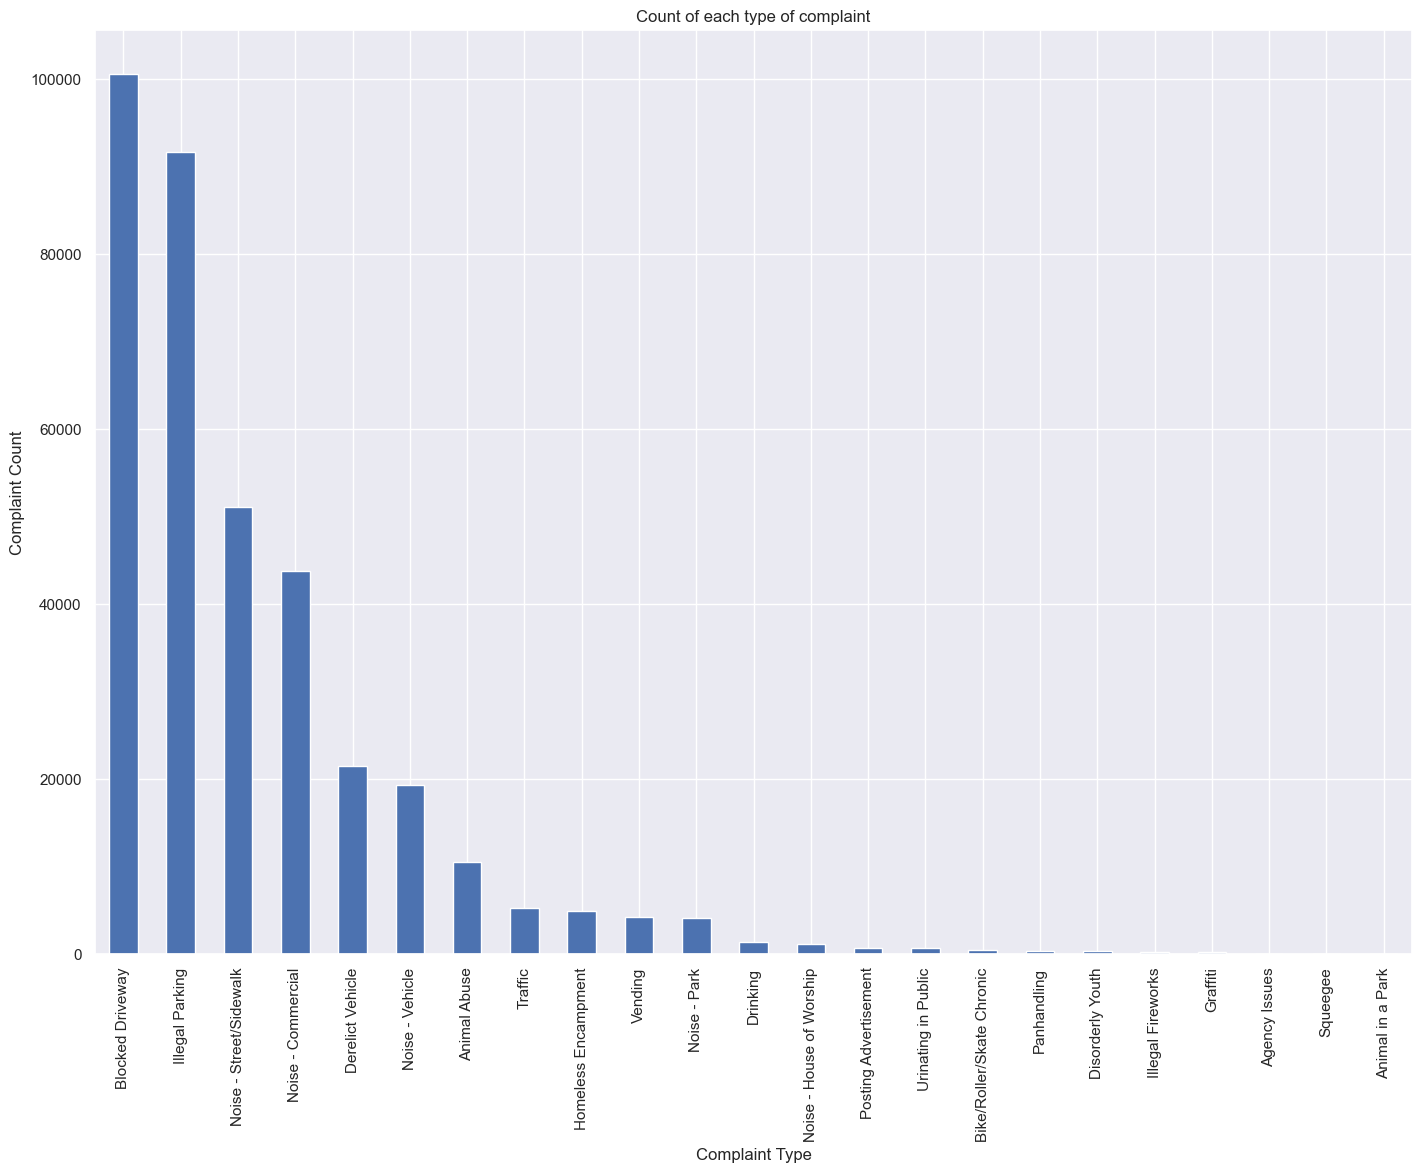

In [28]:
sns.set()
df['Complaint_Type'].value_counts().plot(kind= 'bar', figsize=(17,12), title="Count of each type of complaint")
plt.xlabel('Complaint Type')
plt.ylabel('Complaint Count')
plt.show()

In [29]:
df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'Unknown City',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [30]:
df.loc[df['City']== 'NEW YORK']['Complaint_Type'].value_counts()

Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint_Type, dtype: int64

In [31]:
df['Complaint_Type'].value_counts()[0:10]

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint_Type, dtype: int64

In [32]:
top10_complaints= np.array(df['Complaint_Type'].value_counts()[0:10].index)

In [33]:
df_new= pd.DataFrame()

In [34]:
for i in df['City'].unique():
    df_new[i]= df.loc[df['City']== i]['Complaint_Type'].value_counts()

In [35]:
df_new.head()

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,...,FLORAL PARK,NEW HYDE PARK,CENTRAL PARK,BREEZY POINT,QUEENS,Astoria,Long Island City,Woodside,East Elmhurst,Howard Beach
Noise - Street/Sidewalk,22245,409.0,9144.0,228.0,13982.0,13.0,238.0,38.0,64.0,81.0,...,3.0,NaN,105.0,1.0,6.0,145.0,28.0,5.0,NaN,NaN
Noise - Commercial,18686,1653.0,2944.0,85.0,13855.0,203.0,619.0,13.0,82.0,36.0,...,3.0,4.0,NaN,4.0,6.0,310.0,19.0,2.0,NaN,NaN
Illegal Parking,14549,1340.0,9889.0,760.0,33532.0,276.0,240.0,1104.0,640.0,237.0,...,72.0,32.0,5.0,16.0,10.0,277.0,64.0,124.0,28.0,NaN
Noise - Vehicle,6294,236.0,3556.0,69.0,5965.0,23.0,75.0,45.0,60.0,50.0,...,2.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
Homeless Encampment,3060,32.0,275.0,34.0,948.0,5.0,11.0,5.0,6.0,11.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


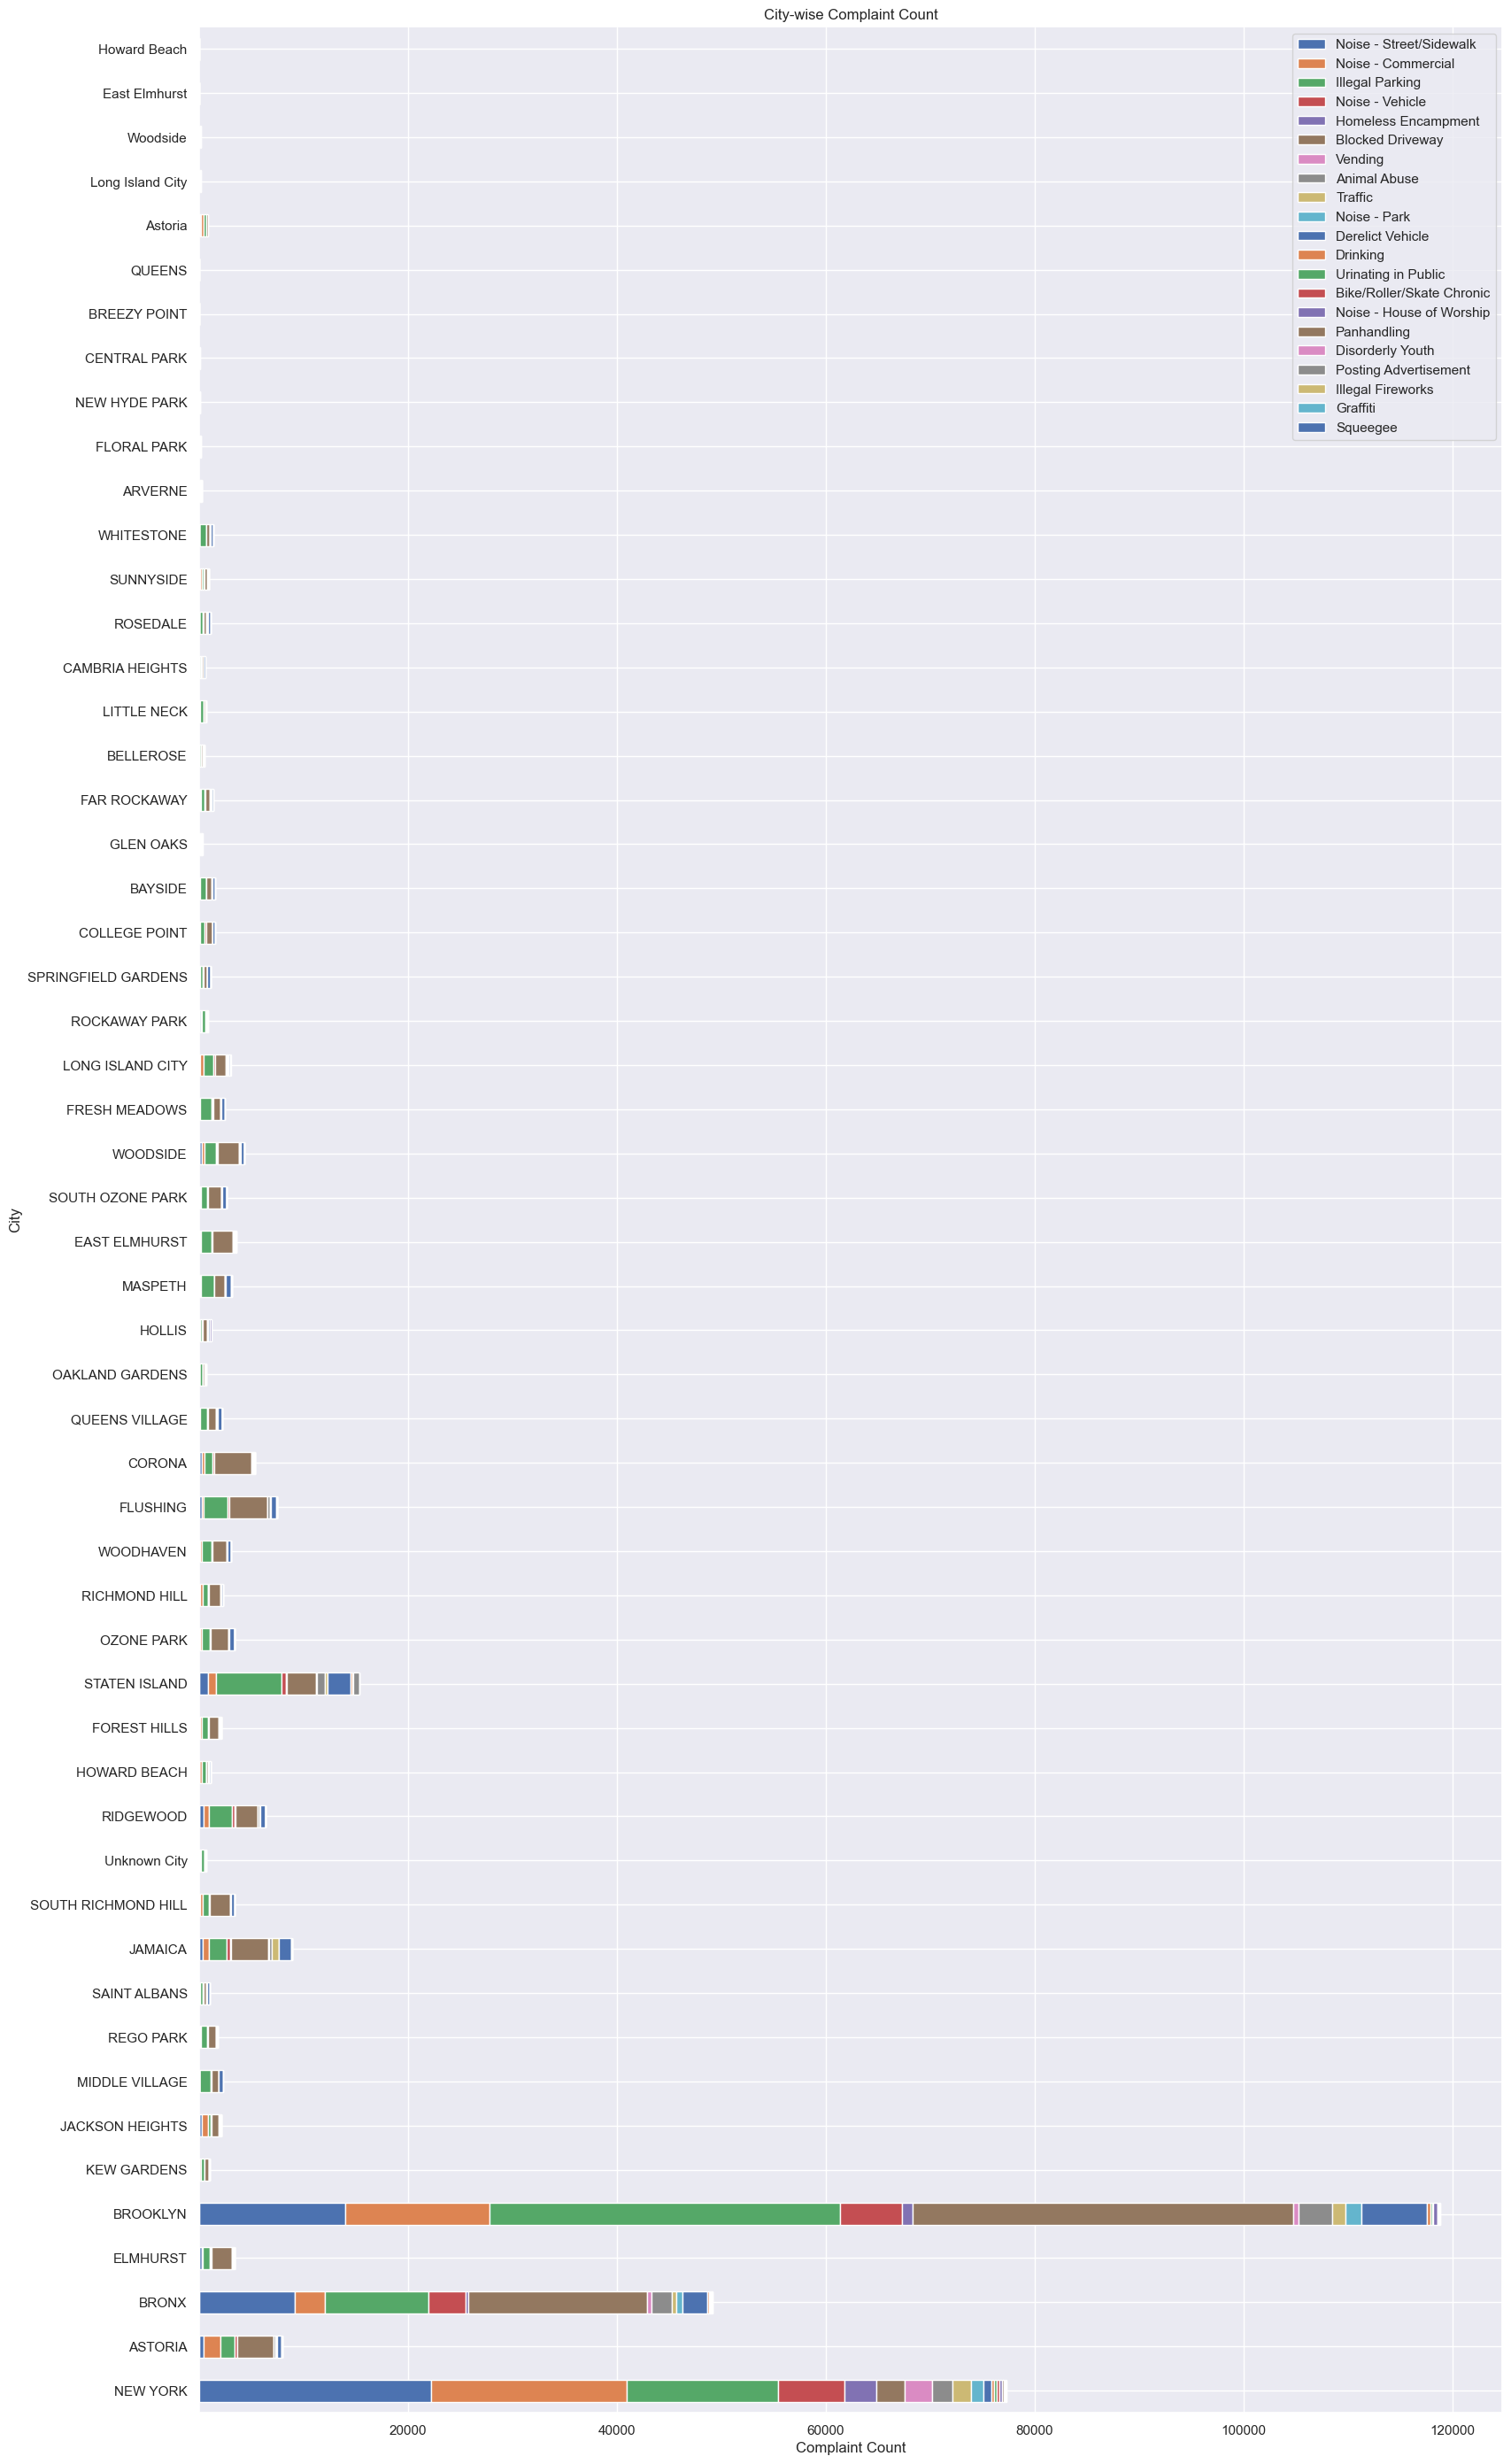

In [36]:
sns.set()
df_new.T.plot(kind= 'barh', stacked= True, figsize= (19, 35), title="City-wise Complaint Count")
plt.xlabel('Complaint Count')
plt.ylabel('City')
plt.show()

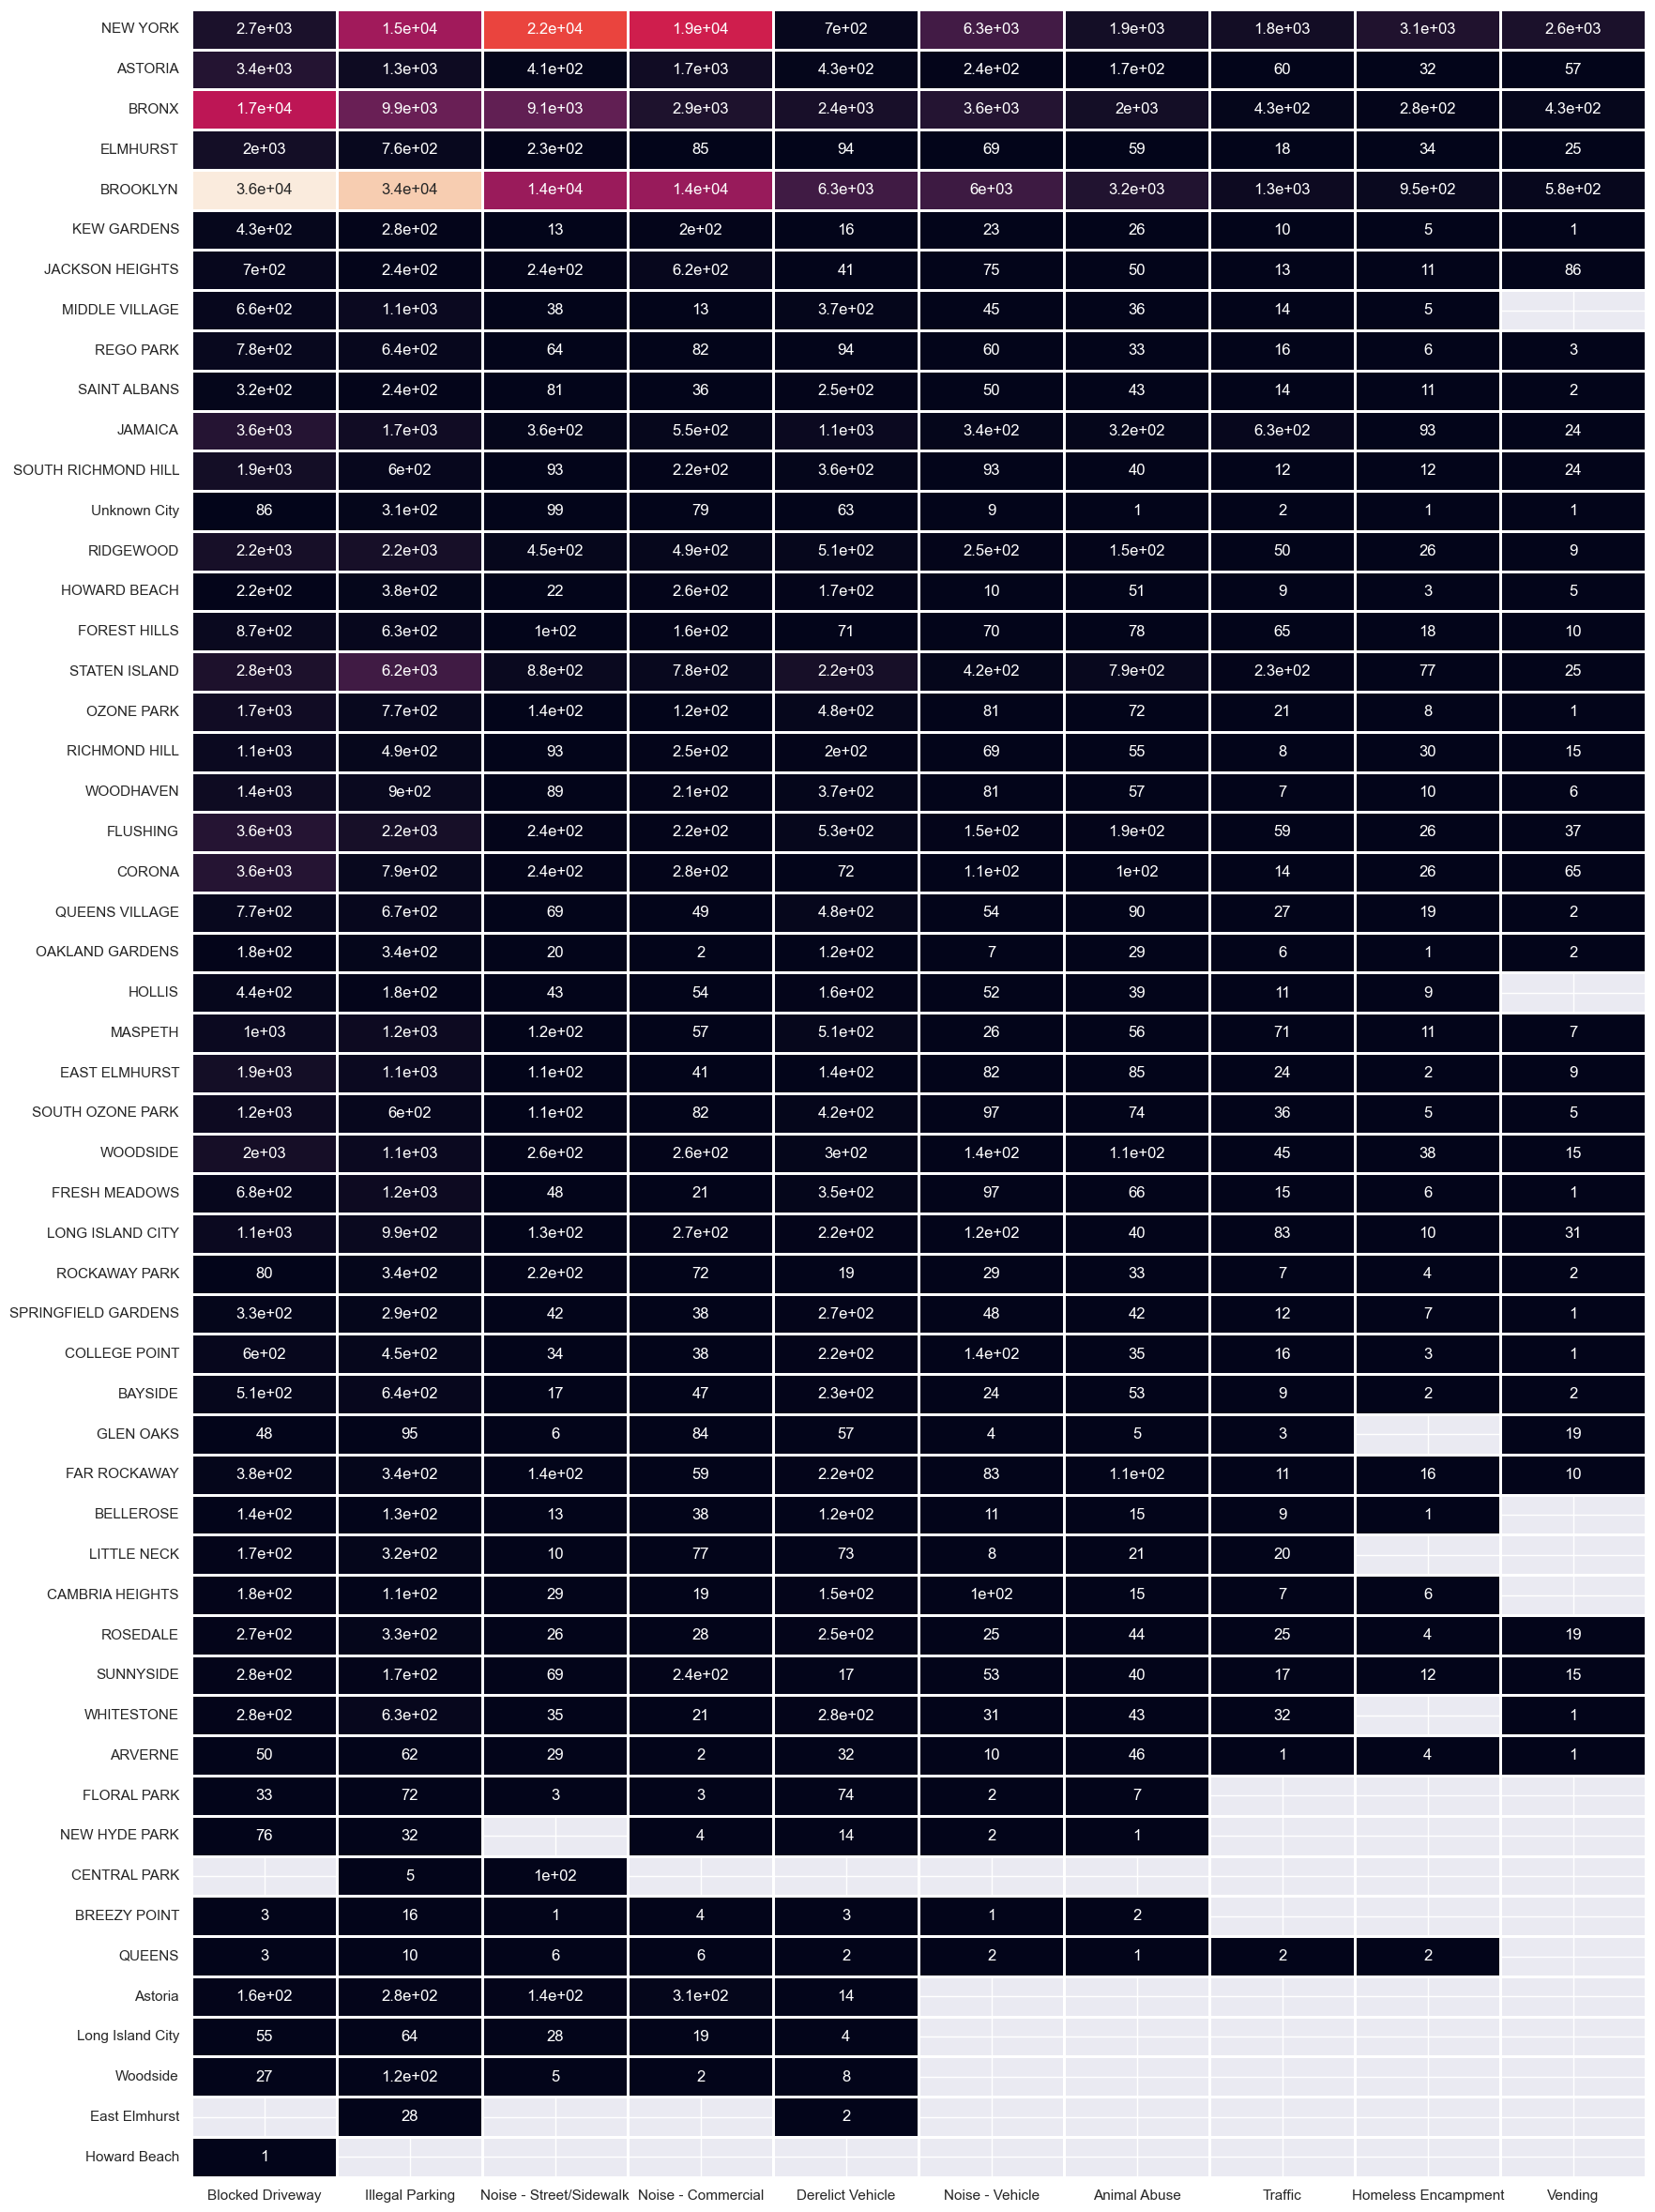

In [37]:
df_new_T= df_new.T
sns.set()
f, ax = plt.subplots(figsize=(20, 30))
sns.heatmap(df_new_T[top10_complaints], annot=True, cbar=False, linewidths=.8, ax=ax)
plt.show()

In [38]:
df.groupby(['City', 'Complaint_Type'], sort= True).Request_Closing_Time.mean()

City      Complaint_Type         
ARVERNE   Animal Abuse                8399.195652
          Blocked Driveway            8318.840000
          Derelict Vehicle           11394.000000
          Disorderly Youth           12928.500000
          Drinking                     859.000000
                                         ...     
Woodside  Blocked Driveway           15566.185185
          Derelict Vehicle           19994.500000
          Illegal Parking            17293.459677
          Noise - Commercial          8619.000000
          Noise - Street/Sidewalk    12285.600000
Name: Request_Closing_Time, Length: 792, dtype: float64

In [39]:
df.groupby(['Complaint_Type'], sort= True).Request_Closing_Time.mean()

Complaint_Type
Agency Issues                1.828912e+04
Animal Abuse                 1.803256e+04
Animal in a Park             1.212634e+06
Bike/Roller/Skate Chronic    1.312369e+04
Blocked Driveway             1.623252e+04
Derelict Vehicle             2.535960e+04
Disorderly Youth             1.236375e+04
Drinking                     1.382130e+04
Graffiti                     2.327634e+04
Homeless Encampment          1.545138e+04
Illegal Fireworks            1.011348e+04
Illegal Parking              1.565044e+04
Noise - Commercial           1.108576e+04
Noise - House of Worship     1.139109e+04
Noise - Park                 1.222606e+04
Noise - Street/Sidewalk      1.223130e+04
Noise - Vehicle              1.256180e+04
Panhandling                  1.585355e+04
Posting Advertisement        7.286256e+03
Squeegee                     1.456025e+04
Traffic                      1.230912e+04
Urinating in Public          1.295929e+04
Vending                      1.436628e+04
Name: Request_Closi

In [40]:
df.Request_Closing_Time.describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_Closing_Time, dtype: float64

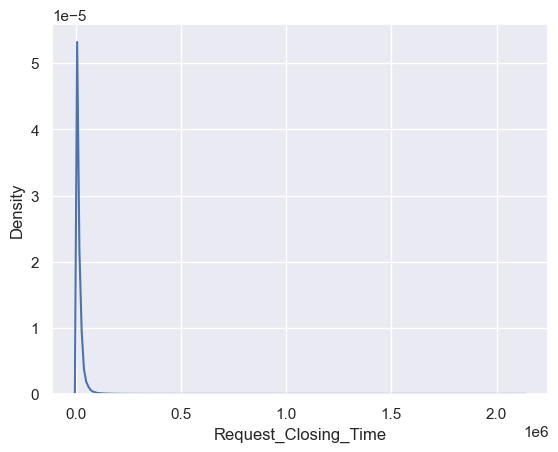

In [50]:
sns.set()
sns.distplot(df.Request_Closing_Time, hist= False)
plt.show()

In [51]:
from scipy.stats import shapiro
stat, p= shapiro(df.Request_Closing_Time)
print(stat, p)

0.5136185884475708 0.0


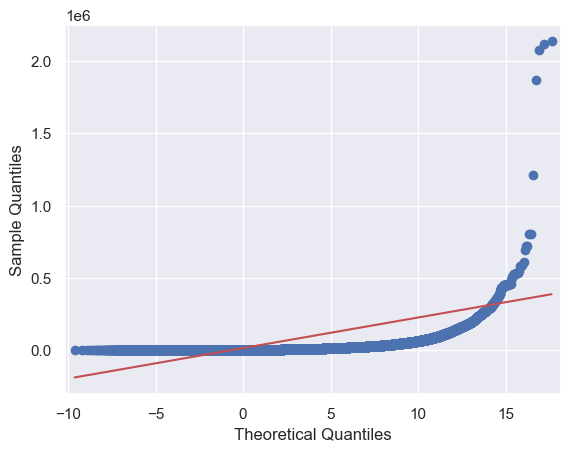

In [52]:
import statsmodels.api as sm
import pylab
sm.qqplot(df.Request_Closing_Time, loc = 4, scale = 3, line='s')
pylab.show()

In [53]:
Complaint_Types= df.Complaint_Type.unique()

In [54]:
len(Complaint_Types)

23

In [55]:
new= []
for i in Complaint_Types:
  new.append(df.loc[df['Complaint_Type']== i]['Request_Closing_Time'].ravel())

In [56]:
new[20]

array([27090., 37381.,  9736., 24686.,  4073., 10628., 30818.,  1901.])

In [57]:
from scipy.stats import kruskal
stat, p = kruskal(new[0],new[1], new[2],new[3], new[4], new[5], new[6], new[7], new[8], new[9], new[10], new[11], new[12], new[13], new[14], new[15], new[16], new[17], new[18], new[19],new[20], new[21], new[22])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=11988.269, p=0.000
Different distributions (reject H0)


In [58]:
contingency_table = pd.crosstab(df['City'],df['Complaint_Type'], margins= True)
contingency_table.head()

Complaint_Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending,All
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,46,0,0,50,32,2,1,1,4,...,2,29,10,1,0,0,1,1,1,259
ASTORIA,0,170,0,16,3436,426,5,43,4,32,...,64,409,236,2,3,0,60,10,57,7991
Astoria,0,0,0,0,159,14,0,0,0,0,...,0,145,0,0,0,0,0,0,0,905
BAYSIDE,0,53,0,0,514,231,2,1,3,2,...,4,17,24,0,0,0,9,0,2,1550
BELLEROSE,0,15,0,1,138,120,2,1,0,1,...,1,13,11,1,1,0,9,1,0,487


In [59]:
contingency_table.shape

(55, 24)

In [60]:
contingency_table.iloc[0:5][0:24].values

array([[   0,   46,    0,    0,   50,   32,    2,    1,    1,    4,    0,
          62,    2,   14,    2,   29,   10,    1,    0,    0,    1,    1,
           1,  259],
       [   0,  170,    0,   16, 3436,  426,    5,   43,    4,   32,    4,
        1340, 1653,   21,   64,  409,  236,    2,    3,    0,   60,   10,
          57, 7991],
       [   0,    0,    0,    0,  159,   14,    0,    0,    0,    0,    0,
         277,  310,    0,    0,  145,    0,    0,    0,    0,    0,    0,
           0,  905],
       [   0,   53,    0,    0,  514,  231,    2,    1,    3,    2,    0,
         638,   47,    3,    4,   17,   24,    0,    0,    0,    9,    0,
           2, 1550],
       [   0,   15,    0,    1,  138,  120,    2,    1,    0,    1,    1,
         132,   38,    1,    1,   13,   11,    1,    1,    0,    9,    1,
           0,  487]], dtype=int64)

In [61]:
f_obs= []
for i in range(0, contingency_table.shape[0]-1):
    f_obs.append(contingency_table.iloc[i][0:24].values)
f_obs= np.array(f_obs)
f_obs[0:5]

array([[   0,   46,    0,    0,   50,   32,    2,    1,    1,    4,    0,
          62,    2,   14,    2,   29,   10,    1,    0,    0,    1,    1,
           1,  259],
       [   0,  170,    0,   16, 3436,  426,    5,   43,    4,   32,    4,
        1340, 1653,   21,   64,  409,  236,    2,    3,    0,   60,   10,
          57, 7991],
       [   0,    0,    0,    0,  159,   14,    0,    0,    0,    0,    0,
         277,  310,    0,    0,  145,    0,    0,    0,    0,    0,    0,
           0,  905],
       [   0,   53,    0,    0,  514,  231,    2,    1,    3,    2,    0,
         638,   47,    3,    4,   17,   24,    0,    0,    0,    9,    0,
           2, 1550],
       [   0,   15,    0,    1,  138,  120,    2,    1,    0,    1,    1,
         132,   38,    1,    1,   13,   11,    1,    1,    0,    9,    1,
           0,  487]], dtype=int64)

In [62]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(145971.80461890678, 0.0, 1219)